# Import Data

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file
data=pd.read_csv('https://drive.google.com/uc?id=1-IPjL7WS4lXgYWL7mnmykZ_Z_rvKcolL', header=0)

# Drop the first two columns
data = data.iloc[:, 2:]

# Separate features (X) and target (y)
X = data.iloc[:, :-1]  # All features except the 25th feature
y = data.iloc[:, -1]   # 25th feature

In [62]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split Train and Test Data

In [63]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.4, random_state=42)


# Train Model with 500 iter

In [64]:
from sklearn.neural_network import MLPClassifier

# Initialize the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train, y_train)


MLPClassifier(max_iter=500, random_state=42)

# Confusion Matrix

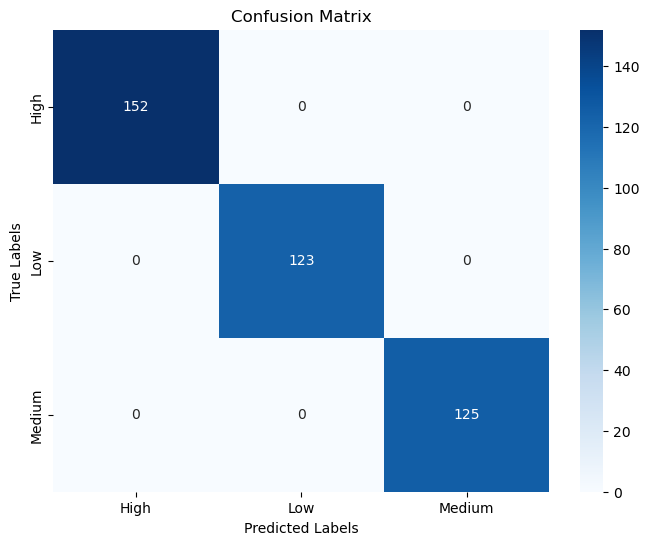

In [65]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()


# Feature Importance 

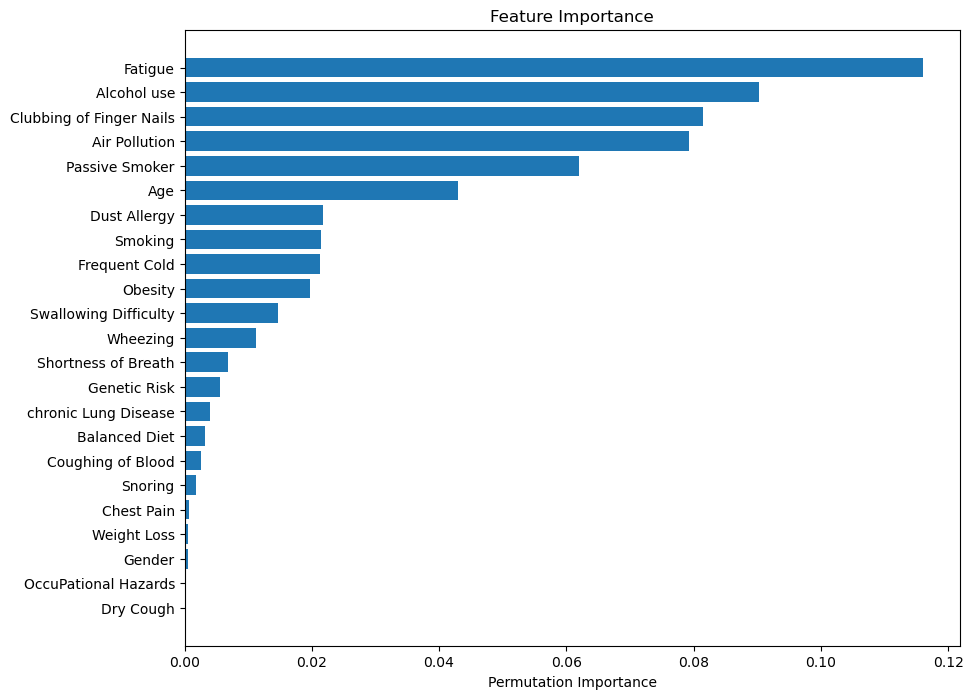

In [66]:
from sklearn.inspection import permutation_importance

# Calculate feature importances
result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()


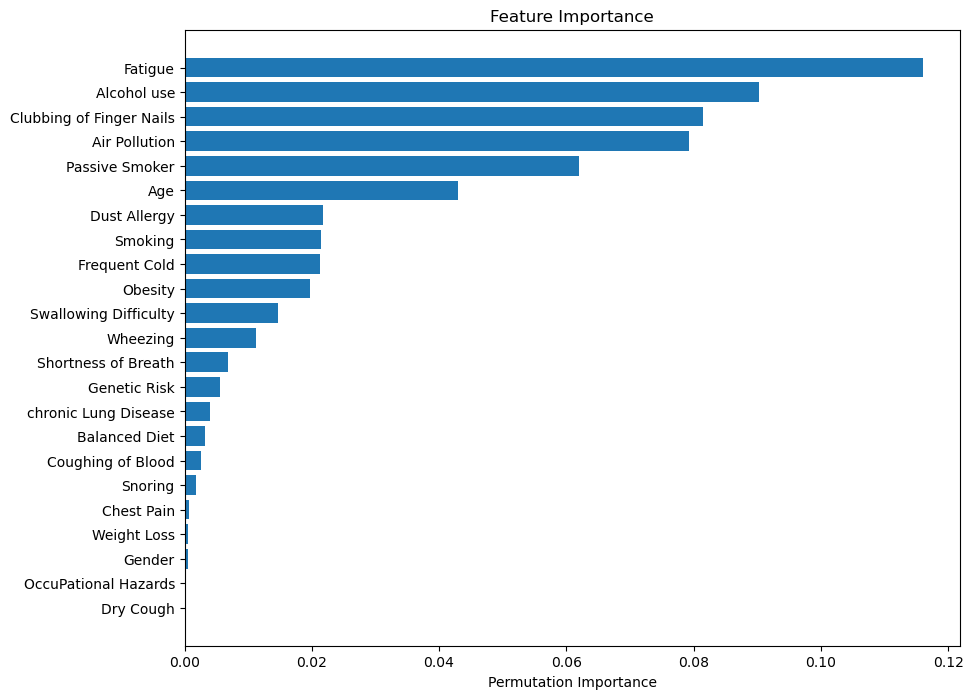

In [67]:
from sklearn.inspection import permutation_importance

# Calculate feature importances
result = permutation_importance(mlp, X_test, y_test, n_repeats=10, random_state=42)
sorted_idx = result.importances_mean.argsort()

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(X.columns[sorted_idx], result.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
plt.title("Feature Importance")
plt.show()


# Test different models with only 25 iter

In [68]:
# Define activation functions to compare
activation_functions = ['relu', 'tanh', 'logistic']

# Store results for comparison
results = []

for activation in activation_functions:
    print(f"Training MLP with activation function: {activation}")
    
    # Initialize and train the MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, max_iter=25, random_state=42)
    mlp.fit(X_train, y_train)
    
    # Make predictions
    y_pred = mlp.predict(X_test)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {activation}: {accuracy}\n")
    
    # Save the results for comparison
    results.append({
        'Activation': activation,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred, target_names=label_encoder.classes_)
    })

Training MLP with activation function: relu
Accuracy with relu: 0.8225

Training MLP with activation function: tanh
Accuracy with tanh: 0.895

Training MLP with activation function: logistic
Accuracy with logistic: 0.8625



C:\Users\Aalla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Aalla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Aalla\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  warnings.warn(


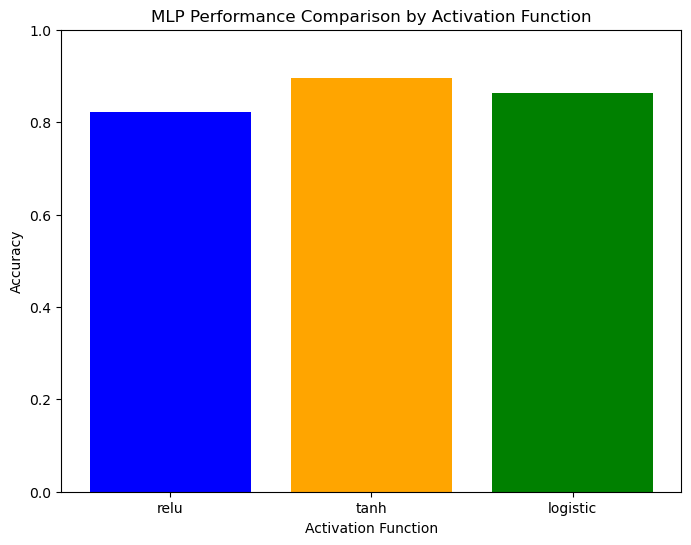

In [69]:

# Extract activation functions and corresponding accuracies
activations = [result['Activation'] for result in results]
accuracies = [result['Accuracy'] for result in results]

# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(activations, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('MLP Performance Comparison by Activation Function')
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.show()

# Test different models with 500 iter

In [70]:
# Define activation functions to compare
activation_functions = ['relu', 'tanh', 'logistic']

# Store results for comparison
results = []

for activation in activation_functions:
    print(f"Training MLP with activation function: {activation}")
    
    # Initialize and train the MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,), activation=activation, max_iter=500, random_state=42)
    mlp.fit(X_train, y_train)
    
    # Make predictions
    y_pred = mlp.predict(X_test)
    
    # Evaluate model performance
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy with {activation}: {accuracy}\n")
    
    # Save the results for comparison
    results.append({
        'Activation': activation,
        'Accuracy': accuracy,
        'Classification Report': classification_report(y_test, y_pred, target_names=label_encoder.classes_)
})

Training MLP with activation function: relu
Accuracy with relu: 1.0

Training MLP with activation function: tanh
Accuracy with tanh: 1.0

Training MLP with activation function: logistic
Accuracy with logistic: 1.0



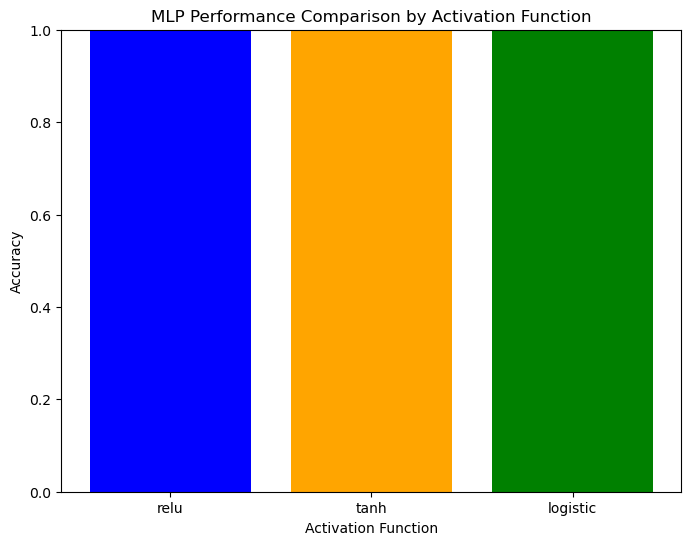

In [71]:

# Extract activation functions and corresponding accuracies
activations = [result['Activation'] for result in results]
accuracies = [result['Accuracy'] for result in results]

# Plot the comparison
plt.figure(figsize=(8, 6))
plt.bar(activations, accuracies, color=['blue', 'orange', 'green'])
plt.xlabel('Activation Function')
plt.ylabel('Accuracy')
plt.title('MLP Performance Comparison by Activation Function')
plt.ylim(0, 1)  # Accuracy ranges between 0 and 1
plt.show()